## Load Data

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

In [2]:
path = pathlib.Path.cwd()
path = path/"data/fashion"

In [3]:
tfms = get_transforms(do_flip=False)

df = pd.read_csv(path/"index.csv")
df.head()

np.random.seed(55)
data = ImageDataBunch.from_csv(path, csv_labels="index.csv", fn_col=1, label_col=0, ds_tfms=tfms, size=28).normalize(imagenet_stats)

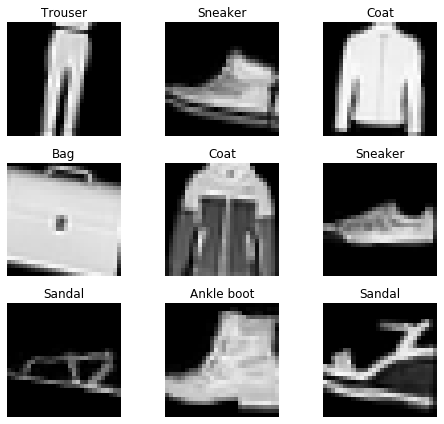

In [4]:
data.show_batch(rows=3, figsize=(7,6))

In [5]:
print(data.classes)
len(data.classes),data.c

['Ankle boot', 'Bag', 'Coat', 'Dress', 'Pullover', 'Sandal', 'Shirt', 'Sneaker', 'T-shirt', 'Trouser']


(10, 10)

In [6]:
print(F"Training dataset includes {len(data.train_ds)} images.")
print(F"Validation dataset includes {len(data.valid_ds)} images.")

Training dataset includes 48000 images.
Validation dataset includes 12000 images.


## Resnet 34

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
%time learn.fit_one_cycle(4)  # Defaults, pretty good
# %time learn.fit_one_cycle(1, max_lr=1e-5)  # Example of a crap Model, tiny learn rate

epoch,train_loss,valid_loss,error_rate,time
0,0.986163,0.798819,0.291417,00:55
1,0.697387,0.549673,0.205000,00:53
2,0.585810,0.482533,0.181000,00:53
3,0.572291,0.466195,0.174917,00:53


CPU times: user 3min 23s, sys: 13.3 s, total: 3min 36s
Wall time: 3min 36s


In [8]:
learn.save('stage1_resnet34')

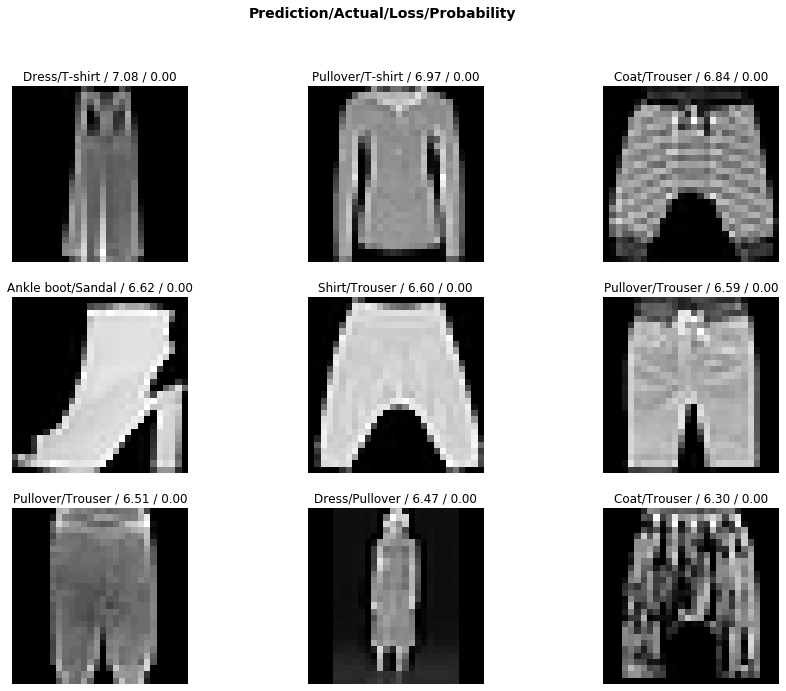

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

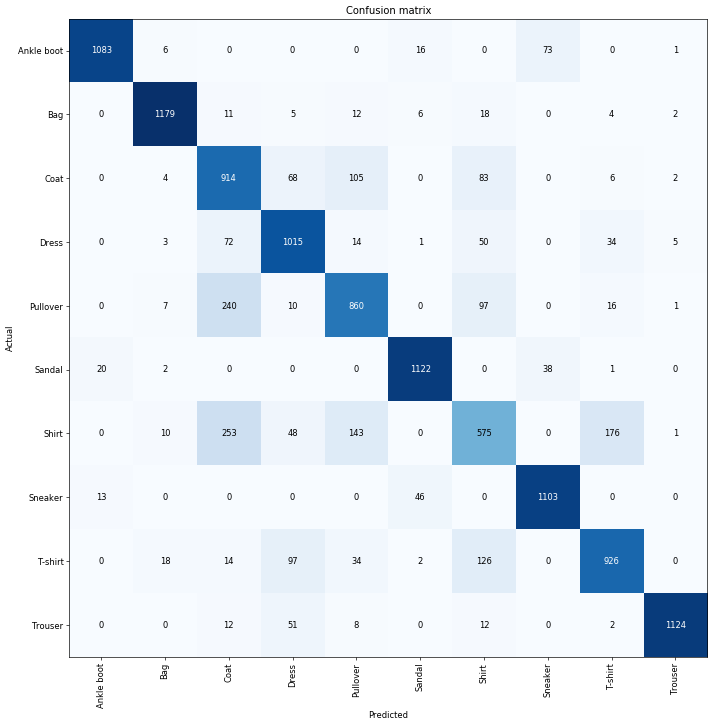

In [10]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Resnet 50

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ec2-user/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [12]:
%time learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.945164,0.699206,0.246833,01:13
1,0.641480,0.490275,0.183500,01:10
2,0.534583,0.422872,0.162083,01:10
3,0.469990,0.382924,0.145583,01:10
4,0.454825,0.365492,0.138250,01:10


CPU times: user 5min 27s, sys: 32.1 s, total: 5min 59s
Wall time: 5min 54s


In [13]:
learn.save('stage2_resnet50')

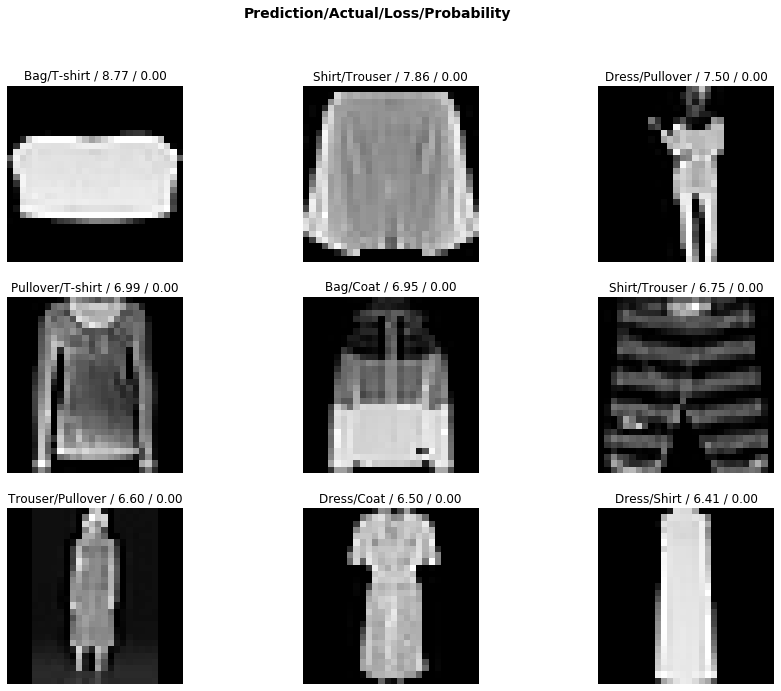

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

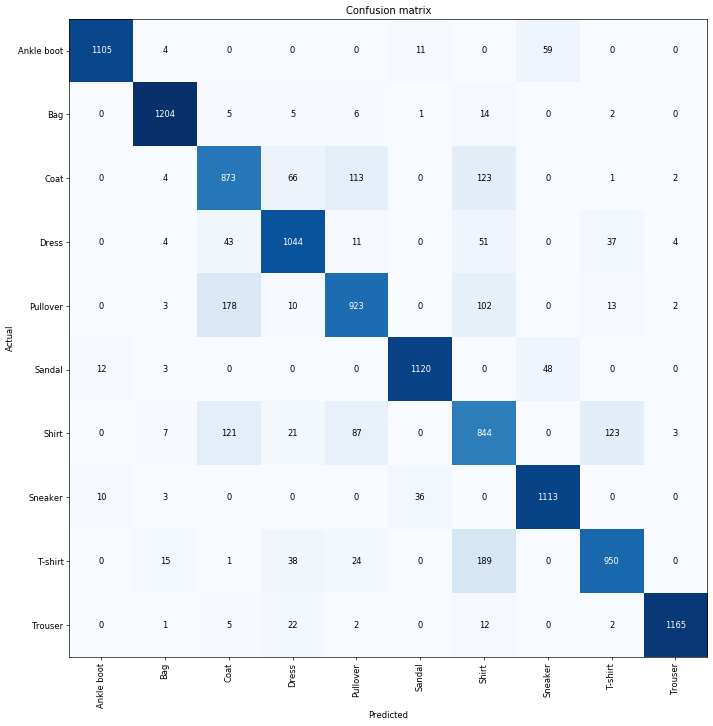

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Predict

In [16]:
learn.export()
defaults.device = torch.device('cpu')

In [17]:
path

img = open_image(path/'img'/'fashion1.png')
img

In [18]:
learn = load_learner(path)
pred_class,pred_idx,outputs = learn.predict(img)

print(F"The image is a {pred_class}")

The image is a T-shirt
